In [1]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
HEADER = ["ind_ahor_fin_ult1",
          "ind_aval_fin_ult1", "ind_cco_fin_ult1",
          "ind_cder_fin_ult1", "ind_cno_fin_ult1",
          "ind_ctju_fin_ult1", "ind_ctma_fin_ult1",
          "ind_ctop_fin_ult1", "ind_ctpp_fin_ult1",
          "ind_deco_fin_ult1", "ind_deme_fin_ult1",
          "ind_dela_fin_ult1", "ind_ecue_fin_ult1",
          "ind_fond_fin_ult1", "ind_hip_fin_ult1",
          "ind_plan_fin_ult1", "ind_pres_fin_ult1",
          "ind_reca_fin_ult1", "ind_tjcr_fin_ult1",
          "ind_valo_fin_ult1", "ind_viv_fin_ult1",
          "ind_nomina_ult1", "ind_nom_pens_ult1",
          "ind_recibo_ult1"]



In [2]:
tr = pandas.read_csv('data/sorted_train.csv', usecols=[0, 1] + range(24, 48))

In [3]:
added_products = pandas.read_csv('data/added_product_2015_05_28.csv')

In [19]:
added_products.loc[1]['ncodpers']

15897

In [6]:
def plot_id_product_timeseries(person_id):
    temp = tr.loc[tr["ncodpers"] == person_id]
    del(temp['ncodpers'])
    sns.heatmap(temp.set_index('fecha_dato'), annot = True)
    plt.tick_params(labelsize=12, labelcolor="#c60b1e")

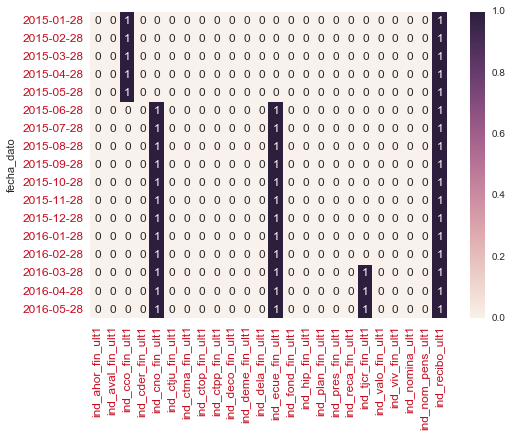

In [37]:
plot_id_product_timeseries(added_products.loc[36420]['ncodpers'])

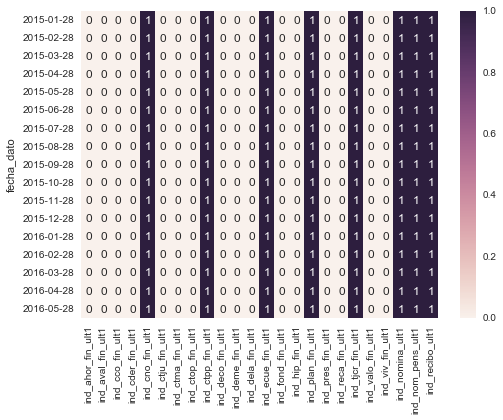

In [5]:
plot_id_product_timeseries(15890)

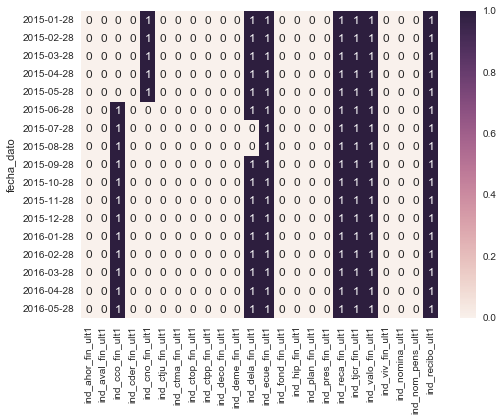

In [6]:
plot_id_product_timeseries(15892)

In [7]:
ids = list(set(tr["ncodpers"]))

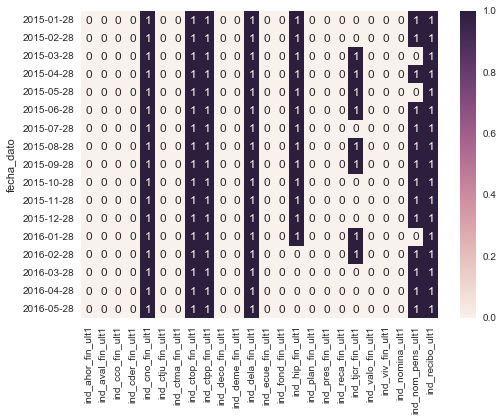

In [25]:
plot_id_product_timeseries(ids[15])

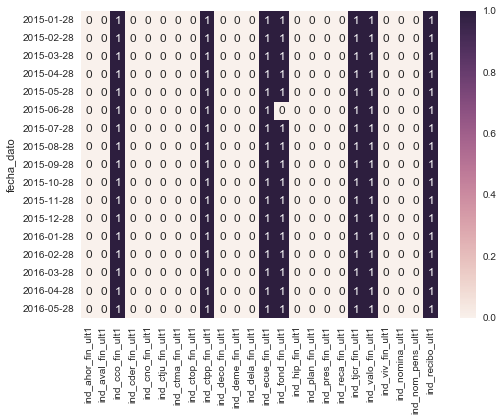

In [22]:
plot_id_product_timeseries(ids[12])

In [2]:
# tr = pandas.read_csv('data/sample_sorted_train.csv')
# tr.head()
# tr_15889 = tr.loc[tr['ncodpers'] == 15889]
# tr_15889_feats = tr_15889.iloc[:, [0] + range(24, 48)]
# tr_15889_feats.head()
# sns.heatmap(tr_15889_feats.set_index('fecha_dato'), annot = True)
# sns.stripplot(x=["ind_tjcr_fin_ult1", "ind_plan_fin_ult1"], y="fecha_dato", data=tr_15889, hue='ind_tjcr_fin_ult1');

In [27]:
te = pandas.read_csv('data/sample_sorted_train.csv', usecols=[0,1]+ range(24,48))

In [28]:
temp_gb = te.groupby('ncodpers')

In [30]:
temp_gb.sum()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ncodpers,,,,,,,,,,,,,,,,,,,,,
15889,0,0,17,0,0,0,0,0,17,0,...,0,0,0,0,8,17,0,0,0,0
15890,0,0,0,0,17,0,0,0,17,0,...,0,17,0,0,17,0,0,17,17,17
15891,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15892,0,0,12,0,5,0,0,0,0,0,...,0,0,0,17,17,17,0,0,0,17
15893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,0,0,0,0
15894,0,0,17,0,5,0,0,0,0,0,...,0,0,0,17,17,17,0,17,17,17
15895,0,0,17,0,5,0,0,0,0,0,...,0,17,0,17,17,17,0,0,0,17
15896,0,0,8,0,0,0,0,9,0,0,...,0,0,0,0,0,3,0,0,0,0
15897,0,0,14,0,17,0,0,17,0,0,...,0,17,0,17,17,17,0,0,14,17


In [31]:
from collections import Counter

In [38]:
def get_followings(user):
    if user == 'a':
        return ['b', 'c']
    if user == 'b':
        return ['d', 'e', 'f']
    if user == 'c':
        return ['g']
    if user == 'g':
        return ['h', 'i']
    else:
        return ['a']
    
ALPHA = 0.5
NUM_ITER = 10

def pageRank(start, alpha = ALPHA, num = NUM_ITER):
    probs = Counter()
    probs[start] = 1
    pageRankProbs = pageRankHelper(start, probs, alpha, num)
    return pageRankProbs

def pageRankHelper(start, probs, alpha, num_iter):
    if num_iter < 0:
        return probs
    probsPropogated = Counter()
    probsPropogated[start] = 1 - alpha
    for node, prob in probs.items():
        followings = get_followings(node)
        tempProb = alpha * prob / len(followings)
        for foll in followings:
            probsPropogated[foll] += tempProb
    return pageRankHelper(start, probsPropogated, alpha, num_iter - 1)

In [39]:
pageRank('a', 0.5, 5)

Counter({'a': 0.55078125,
         'b': 0.13671874999999997,
         'c': 0.13671874999999997,
         'd': 0.023437499999999997,
         'e': 0.023437499999999997,
         'f': 0.023437499999999997,
         'g': 0.07031249999999999,
         'h': 0.017578125000000003,
         'i': 0.017578125000000003})

In [44]:
c = pageRank('a')

In [45]:
sorted(c.items(), key = lambda x: x[1], reverse = True)

[('a', 0.5517578125000001),
 ('c', 0.13793945312499997),
 ('b', 0.13793945312499997),
 ('g', 0.068939208984375),
 ('e', 0.022979736328125),
 ('d', 0.022979736328125),
 ('f', 0.022979736328125),
 ('i', 0.017242431640624997),
 ('h', 0.017242431640624997)]